In [2]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr

import rioxarray

In [3]:
ds = xr.open_dataset('../data/outputs/sites/metrics/x1-y1-z1/EPO_Y_10.nc')
ds

<xarray.Dataset> Size: 127MB
Dimensions:        (x: 207, y: 308, z: 37)
Coordinates:
  * x              (x) float64 2kB 4.622e+05 4.622e+05 ... 4.624e+05 4.624e+05
  * y              (y) float64 2kB 5.26e+06 5.26e+06 ... 5.26e+06 5.26e+06
  * z              (z) float64 296B 0.0 1.0 2.0 3.0 4.0 ... 33.0 34.0 35.0 36.0
Data variables: (12/33)
    num_points     (x, y) float64 510kB ...
    num_pulses     (x, y) float64 510kB ...
    total_count    (x, y) float64 510kB ...
    total_weight   (x, y) float64 510kB ...
    ground_count   (x, y) float64 510kB ...
    ground_weight  (x, y) float64 510kB ...
    ...             ...
    inside_count   (z, x, y) float64 19MB ...
    enter_count    (z, x, y) float64 19MB ...
    exit_count     (z, x, y) float64 19MB ...
    inside_weight  (z, x, y) float64 19MB ...
    enter_weight   (z, x, y) float64 19MB ...
    exit_weight    (z, x, y) float64 19MB ...
Attributes:
    xy_bin_size:  1
    z_bin_size:   1
    site_id:      EPO_Y_10

In [4]:
ds['x'] = ds['x'] + 0.5
ds['y'] = ds['y'] + 0.5
ds.rio.write_crs(7855, inplace=True)
ds.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
ds.rio.write_coordinate_system(inplace=True)
ds

<xarray.Dataset> Size: 127MB
Dimensions:        (x: 207, y: 308, z: 37)
Coordinates:
  * x              (x) float64 2kB 4.622e+05 4.622e+05 ... 4.624e+05 4.624e+05
  * y              (y) float64 2kB 5.26e+06 5.26e+06 ... 5.26e+06 5.26e+06
  * z              (z) float64 296B 0.0 1.0 2.0 3.0 4.0 ... 33.0 34.0 35.0 36.0
    spatial_ref    int64 8B 0
Data variables: (12/33)
    num_points     (x, y) float64 510kB ...
    num_pulses     (x, y) float64 510kB ...
    total_count    (x, y) float64 510kB ...
    total_weight   (x, y) float64 510kB ...
    ground_count   (x, y) float64 510kB ...
    ground_weight  (x, y) float64 510kB ...
    ...             ...
    inside_count   (z, x, y) float64 19MB ...
    enter_count    (z, x, y) float64 19MB ...
    exit_count     (z, x, y) float64 19MB ...
    inside_weight  (z, x, y) float64 19MB ...
    enter_weight   (z, x, y) float64 19MB ...
    exit_weight    (z, x, y) float64 19MB ...
Attributes:
    xy_bin_size:  1
    z_bin_size:   1
    site_id:      EPO_Y_10

In [4]:
ds['max_veg'].T.rio.to_raster("EPO_Y_10_chm.tif")

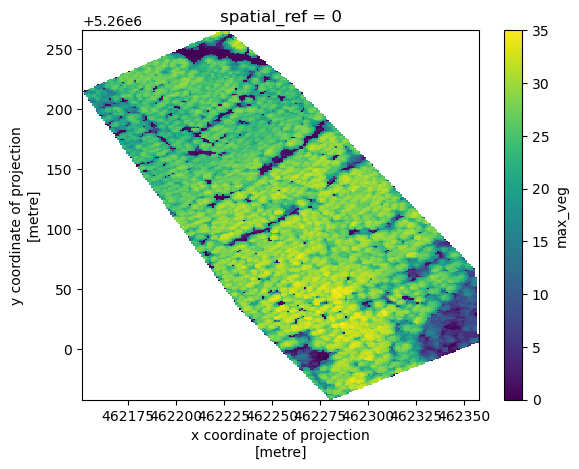

In [5]:
ds['max_veg'].T.plot()

In [6]:
plots_gdf = gpd.read_file("../data/outputs/plots/plots.geojson")
plots_gdf = plots_gdf.set_index("site_plot_id", inplace=False)
plots_gdf

,site,plot_number,id,geometry
site_plot_id,,,,
AGG_O_01_P1,AGG_O_01,1,AGG_O_01_P1,"POLYGON ((463042.83 5259846.736, 463025.797 52..."
AGG_O_01_P2,AGG_O_01,2,AGG_O_01_P2,"POLYGON ((463124.556 5259819.234, 463116.068 5..."
AGG_O_01_P3,AGG_O_01,3,AGG_O_01_P3,"POLYGON ((463201.174 5259815.806, 463200.551 5..."
AGG_O_01_P4,AGG_O_01,4,AGG_O_01_P4,"POLYGON ((463257.777 5259801.962, 463245.303 5..."
AGG_O_01_P5,AGG_O_01,5,AGG_O_01_P5,"POLYGON ((463303.022 5259789.552, 463289.794 5..."
...,...,...,...,...
ULY_Y_96_P1,ULY_Y_96,1,ULY_Y_96_P1,"POLYGON ((455348.476 5275834.517, 455348.154 5..."
ULY_Y_96_P2,ULY_Y_96,2,ULY_Y_96_P2,"POLYGON ((455296.576 5275837.224, 455299.223 5..."
ULY_Y_96_P3,ULY_Y_96,3,ULY_Y_96_P3,"POLYGON ((455252.092 5275834.16, 455248.849 52..."


In [7]:
sel_plots = plots_gdf[plots_gdf['site'] == 'EPO_Y_10']

In [72]:
ds

<xarray.Dataset> Size: 127MB
Dimensions:        (x: 207, y: 308, z: 37)
Coordinates:
  * x              (x) float64 2kB 4.622e+05 4.622e+05 ... 4.624e+05 4.624e+05
  * y              (y) float64 2kB 5.26e+06 5.26e+06 ... 5.26e+06 5.26e+06
  * z              (z) float64 296B 0.0 1.0 2.0 3.0 4.0 ... 33.0 34.0 35.0 36.0
    spatial_ref    int64 8B 0
Data variables: (12/33)
    num_points     (x, y) float64 510kB ...
    num_pulses     (x, y) float64 510kB ...
    total_count    (x, y) float64 510kB ...
    total_weight   (x, y) float64 510kB ...
    ground_count   (x, y) float64 510kB ...
    ground_weight  (x, y) float64 510kB ...
    ...             ...
    inside_count   (z, x, y) float64 19MB ...
    enter_count    (z, x, y) float64 19MB ...
    exit_count     (z, x, y) float64 19MB ...
    inside_weight  (z, x, y) float64 19MB ...
    enter_weight   (z, x, y) float64 19MB ...
    exit_weight    (z, x, y) float64 19MB ...
Attributes:
    xy_bin_size:  1
    z_bin_size:   1
    site_id:      EPO_Y_10

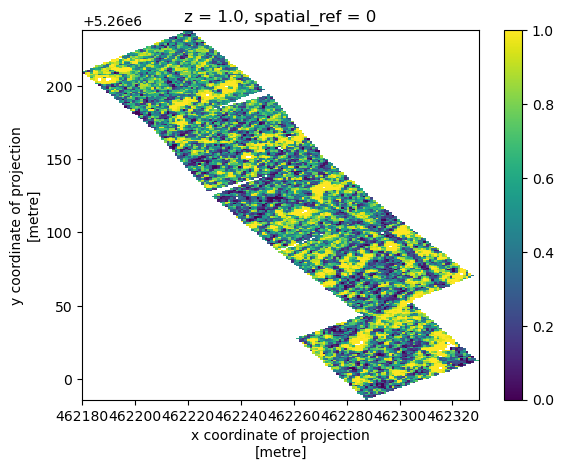

In [106]:
ds.sel(z=1).pipe(lambda ds: 1 - ds['exit_weight'] / ds['enter_weight']).rio.clip(sel_plots.geometry).T.plot()

In [117]:
ds.sel(z=1).pipe(lambda ds: ds['inside_weight'] / ds['enter_weight']).rio.clip(sel_plots.geometry[2:3]).mean()

<xarray.DataArray ()> Size: 8B
array(0.5294049)
Coordinates:
    z            float64 8B 1.0
    spatial_ref  int64 8B 0

In [21]:
mds = ds.sum(dim=['x', 'y'])

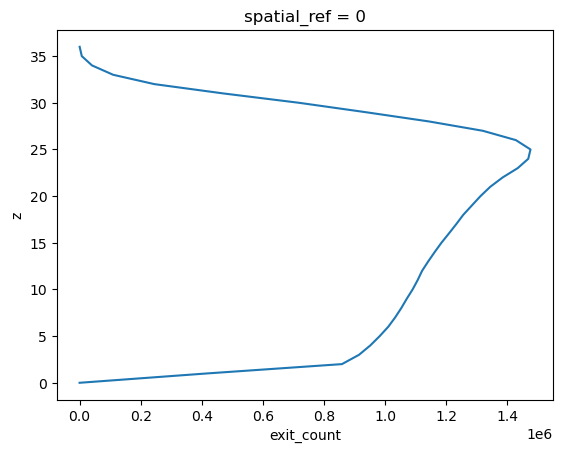

In [ ]:
mds['inside_count'].plot(y='z')

In [13]:
ds[['max_veg', 'mean_veg', 'sd_veg']].transpose('y', 'x').rio.to_raster('multi.tif')